## skip-gram모델 구현

In [14]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 2.67
| 에폭 235 |  반복 1 / 2 | 시간 0[s] | 손실 2.54
| 에폭 236 |  반복 1 / 2 | 시간 0[s] | 손실 2.74
| 에폭 237 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 238 |  반복 1 / 2 | 시간 0[s] | 손실 2.83
| 에폭 239 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 240 |  반복 1 / 2 | 시간 0[s] | 손실 2.65
| 에폭 241 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 242 |  반복 1 / 2 | 시간 0[s] | 손실 2.68
| 에폭 243 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 244 |  반복 1 / 2 | 시간 0[s] | 손실 2.51
| 에폭 245 |  반복 1 / 2 | 시간 0[s] | 손실 2.69
| 에폭 246 |  반복 1 / 2 | 시간 0[s] | 손실 2.57
| 에폭 247 |  반복 1 / 2 | 시간 0[s] | 손실 2.60
| 에폭 248 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 249 |  반복 1 / 2 | 시간 0[s] | 손실 2.62
| 에폭 250 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 251 |  반복 1 / 2 | 시간 0[s] | 손실 2.64
| 에폭 252 |  반복 1 / 2 | 시간 0[s] | 손실 2.55
| 에폭 253 |  반복 1 / 2 | 시간 0[s] | 손실 2.59
| 에폭 254 |  반복 1 / 2 | 시간 0[s] | 손실 2.57
| 에폭 255 |  반복 1

| 에폭 527 |  반복 1 / 2 | 시간 0[s] | 손실 1.82
| 에폭 528 |  반복 1 / 2 | 시간 0[s] | 손실 2.64
| 에폭 529 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 530 |  반복 1 / 2 | 시간 0[s] | 손실 1.97
| 에폭 531 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 532 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 533 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 534 |  반복 1 / 2 | 시간 0[s] | 손실 1.75
| 에폭 535 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 536 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 537 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 538 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 539 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 540 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 541 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 542 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 543 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 544 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 545 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 546 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 547 |  반복 1 / 2 | 시간 0[s] | 손실 1.80
| 에폭 548 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 549 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 550 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 551 |  반복 1

| 에폭 807 |  반복 1 / 2 | 시간 1[s] | 손실 1.96
| 에폭 808 |  반복 1 / 2 | 시간 1[s] | 손실 1.97
| 에폭 809 |  반복 1 / 2 | 시간 1[s] | 손실 2.16
| 에폭 810 |  반복 1 / 2 | 시간 1[s] | 손실 1.95
| 에폭 811 |  반복 1 / 2 | 시간 1[s] | 손실 1.73
| 에폭 812 |  반복 1 / 2 | 시간 1[s] | 손실 2.38
| 에폭 813 |  반복 1 / 2 | 시간 1[s] | 손실 1.51
| 에폭 814 |  반복 1 / 2 | 시간 1[s] | 손실 2.20
| 에폭 815 |  반복 1 / 2 | 시간 1[s] | 손실 1.93
| 에폭 816 |  반복 1 / 2 | 시간 1[s] | 손실 1.96
| 에폭 817 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 818 |  반복 1 / 2 | 시간 1[s] | 손실 2.38
| 에폭 819 |  반복 1 / 2 | 시간 1[s] | 손실 1.73
| 에폭 820 |  반복 1 / 2 | 시간 1[s] | 손실 1.94
| 에폭 821 |  반복 1 / 2 | 시간 1[s] | 손실 2.18
| 에폭 822 |  반복 1 / 2 | 시간 1[s] | 손실 1.48
| 에폭 823 |  반복 1 / 2 | 시간 1[s] | 손실 2.16
| 에폭 824 |  반복 1 / 2 | 시간 1[s] | 손실 2.19
| 에폭 825 |  반복 1 / 2 | 시간 1[s] | 손실 1.48
| 에폭 826 |  반복 1 / 2 | 시간 1[s] | 손실 1.96
| 에폭 827 |  반복 1 / 2 | 시간 1[s] | 손실 2.15
| 에폭 828 |  반복 1 / 2 | 시간 1[s] | 손실 2.16
| 에폭 829 |  반복 1 / 2 | 시간 1[s] | 손실 1.73
| 에폭 830 |  반복 1 / 2 | 시간 1[s] | 손실 2.17
| 에폭 831 |  반복 1

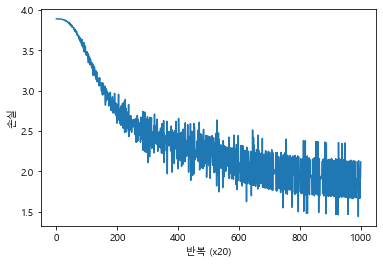

you [-0.01156937 -0.00789118  0.00531061 -0.01786947 -0.0051611 ]
say [ 0.6819905   0.08389595  0.5398516   0.3507646  -1.4115828 ]
goodbye [-0.658439    1.1557592  -0.7021563  -0.8974113   0.74959195]
and [ 1.0734986  -1.3042083   1.1232606   1.191759   -0.05456483]
i [-0.6743293   1.1506041  -0.70440173 -0.8940148   0.72258234]
hello [-1.0823386  -0.8919983  -1.0189614  -0.28992122  1.1058309 ]
. [ 0.0096519  -0.00502687 -0.0224377  -0.00257568 -0.00394724]


In [15]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])